In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,average_precision_score, recall_score,precision_score, f1_score, auc, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder

In [18]:
class Logistic_Regression_Model:
    
    def __init__(self, data_path, selected_features, label):
        self.data_path = data_path
        self.selected_features = selected_features
        self.label = label
        self.model = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='liblinear')
    
    def _load_data(self):
        self.df = pd.read_csv(self.data_path)
        self.df['label'] = self.df['label'].apply(lambda x: x if x == 'normal.' else 'non-attack')
    
    def data_preparation(self):
        le = LabelEncoder()
        self.df[self.label] = le.fit_transform(self.df[self.label])
        X = self.df[self.selected_features]
        y = self.df[self.label]
        X_train, X_test, y_train, y_test = train_test_split(self.df[selected_features], self.df['label'], test_size=0.2, random_state=42)
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
              
    def train_model(self):
        t0 = time.time()
        self.model.fit(self.X_train, self.y_train)
        training_time = time.time() - t0
        
    def evaluate_model(self):
        self.y_pred = self.model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, self.y_pred)
        conf_matrix = confusion_matrix(self.y_test, self.y_pred)
        f1 = f1_score(self.y_test, self.y_pred, average='weighted')
        class_report = classification_report(self.y_test, self.y_pred)
        return accuracy, conf_matrix, f1, class_report

In [19]:
selected_features = ['dst_host_same_src_port_rate',
 'is_guest_login',
 'num_failed_logins',
 'dst_host_diff_srv_rate',
 'rerror_rate',
 'logged_in',
 'serror_rate',
 'same_srv_rate',
 'protocol_type_0',
'protocol_type_1', 
 'dst_host_srv_diff_host_rate']

In [20]:
instance = Logistic_Regression_Model("../../../transformed_datasets/transformed_KDD_CUPP99_2.csv", selected_features, 'label')

In [21]:
instance._load_data()

In [22]:
instance.data_preparation()

In [23]:
instance.train_model()

In [27]:
print(instance.evaluate_model())

(0.9885999469764976, array([[ 50919,   1537],
       [   914, 161629]]), 0.9885767989747524, '              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.98     52456\n           1       0.99      0.99      0.99    162543\n\n    accuracy                           0.99    214999\n   macro avg       0.99      0.98      0.98    214999\nweighted avg       0.99      0.99      0.99    214999\n')


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(instance.X_train, instance.y_train)

best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

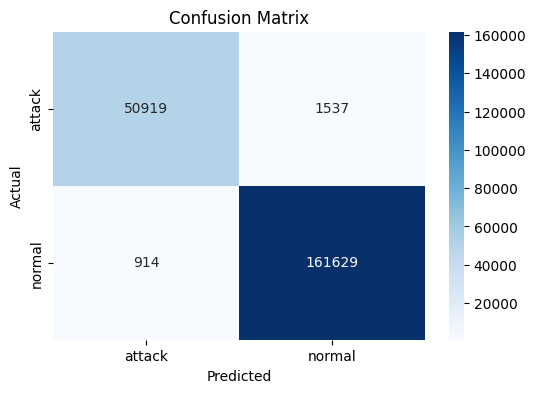

In [28]:
cm = confusion_matrix(instance.y_test, instance.y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['attack', 'normal'], yticklabels=['attack', 'normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
y_pred_proba = instance.model.predict_proba(instance.X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(instance.y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

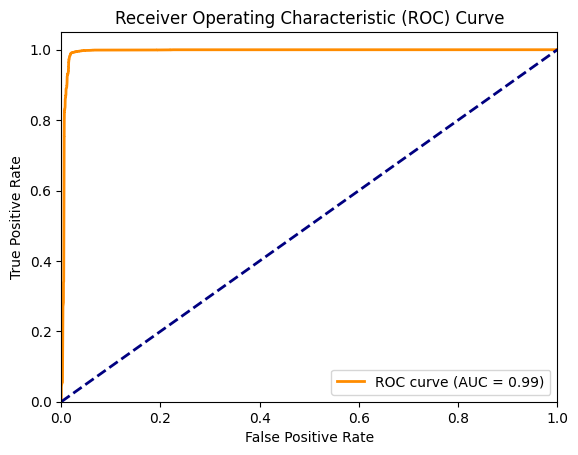

In [26]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
report = classification_report(instance.y_test, instance.y_pred, output_dict=True)

In [31]:
report

{'0': {'precision': 0.9823664460864701,
  'recall': 0.9706992527070306,
  'f1-score': 0.9764980007479216,
  'support': 52456},
 '1': {'precision': 0.9905801453734234,
  'recall': 0.9943768725814093,
  'f1-score': 0.9924748778817901,
  'support': 162543},
 'accuracy': 0.9885999469764976,
 'macro avg': {'precision': 0.9864732957299467,
  'recall': 0.98253806264422,
  'f1-score': 0.9844864393148558,
  'support': 214999},
 'weighted avg': {'precision': 0.9885761462394905,
  'recall': 0.9885999469764976,
  'f1-score': 0.9885767989747524,
  'support': 214999}}

In [33]:
rep_df = pd.DataFrame(report).transpose()

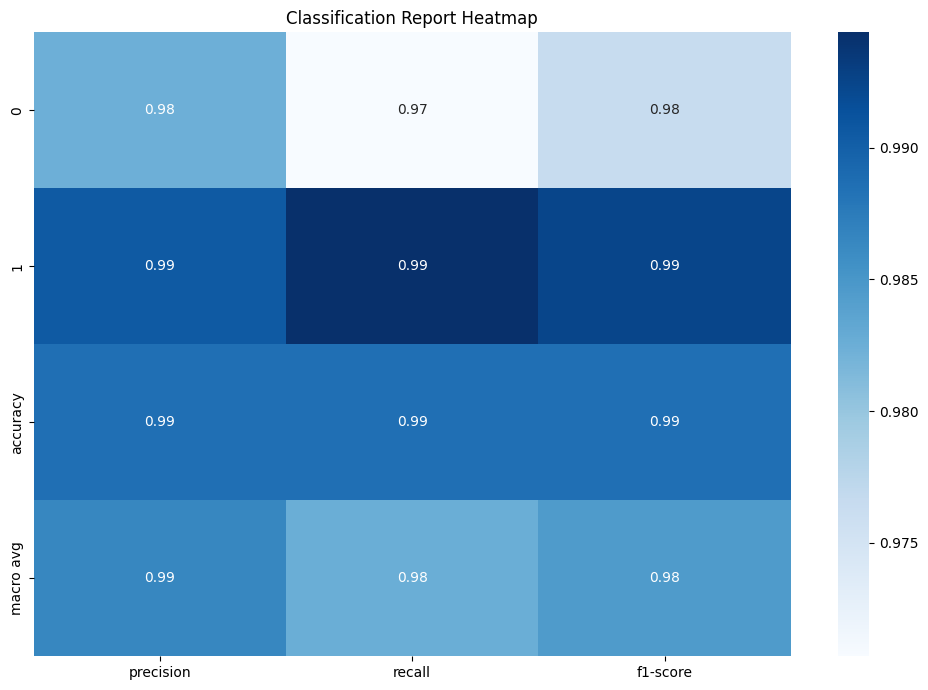

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(rep_df.iloc[:-1, :-1].astype(float), annot=True, cmap="Blues")
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.show()

In [42]:
precision, recall, thresholds = precision_recall_curve(instance.y_test, y_pred_proba)

In [46]:
average_precision = average_precision_score(instance.y_test, y_pred_proba)

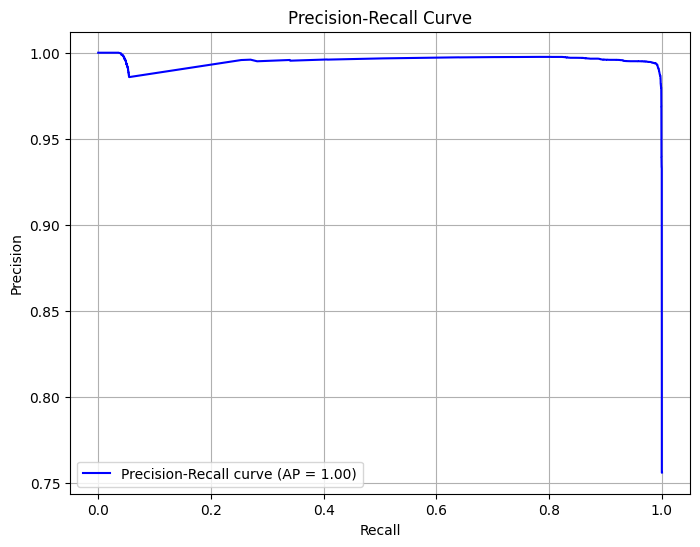

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)